# Import Data

First date of training dataset:  2010-01-04 00:00:00
Last date of training dataset:  2019-02-08 00:00:00
len of training dataset:  2291

First date of validation dataset:  2019-02-11 00:00:00
Last date of validation dataset:  2021-09-14 00:00:00
len of validation dataset:  654

First date of test dataset:  2021-09-15 00:00:00
Last date of test dataset:  2022-12-30 00:00:00
len of test dataset:  327

total dataset lenght:  3272
sum of the three datasets:  3272
original returns dataframe dimension: (3272, 3)


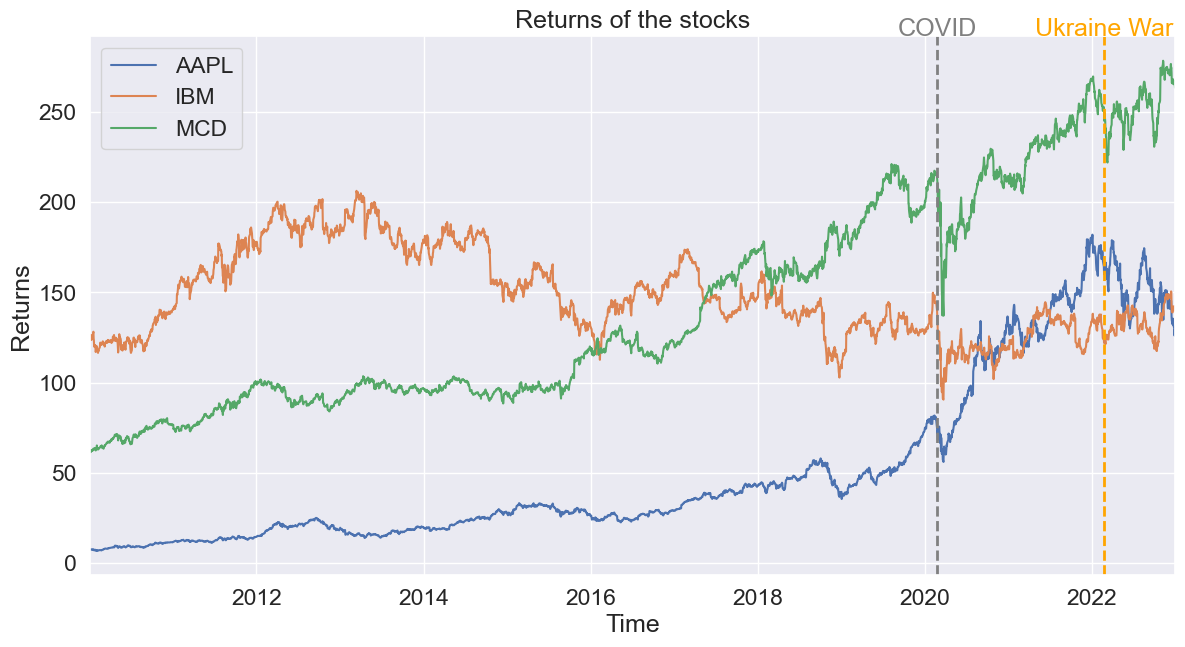

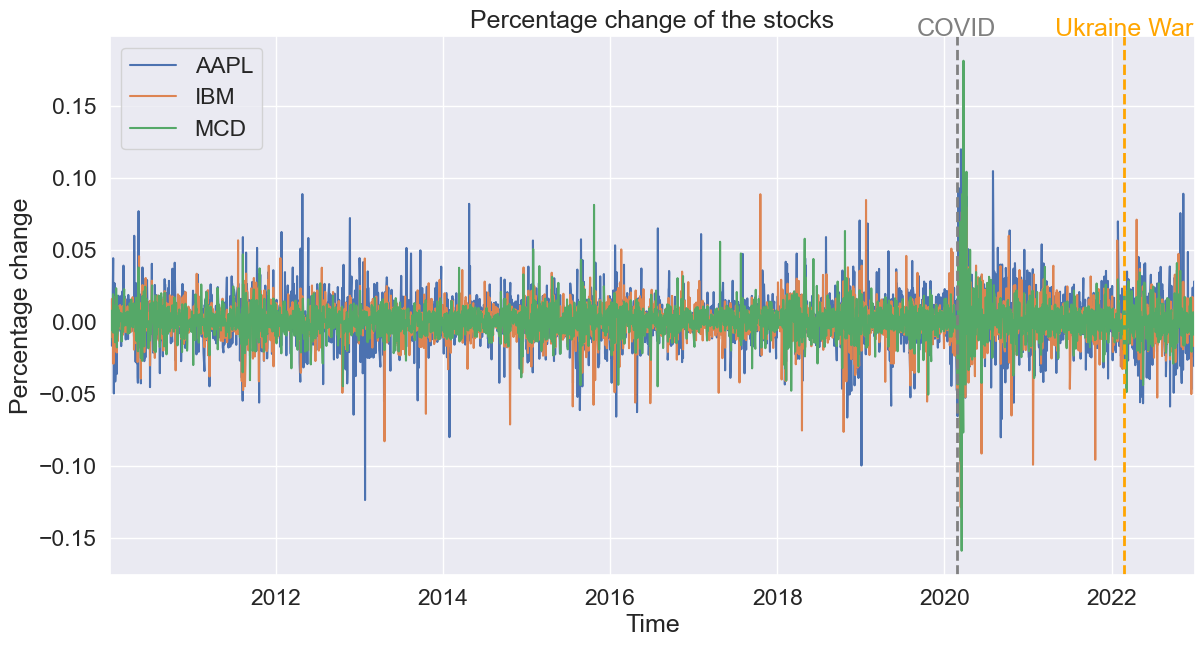

In [1]:
from cvx.covariance.ewma import iterated_ewma, _ewma_cov, _ewma_mean
from cvx.covariance.combination import from_sigmas

from predictorStarter import * # this file contains the import of every dataset, libraries needed and the initial plotting of the data
from predictorsImplementation import * # this file contains the implementation of the predictors ( one function implementation for each predictor)

# Dictionary Initialization

In [2]:
prescientDict = {}
daily_log_likelihoods = {}
daily_regrets = {}

# collections for plotting charts about the performance of the RW predictor
rwValues = []
rwMeanRegretValues = []
rwMeanlogLikelihoodValues = []
prescientAlreadyPrinted = False

# Covariance Predictors

PRESCIENT (GROUND TRUTH)

In [3]:
# THIS CODE IS CALCULATING THE REAL VOLATILITY

# prescient is a dictionary that contains the covariance matrix calculated using the ewma formula written inside the paper
# the key of the dictionary is the timestamp and the value is the covariance matrix calculated for that day

# The prescient predictor will always use the original dataset, so it will be uniformly distributed; this is because the prescient predictor is used to compare the other predictors
# and we need to have a measure of the real covariance matrix; so this can't be used with the non-uniformly distributed dataset

prescientDict = originalPrescientPredictor(uniformlyDistributedReturns)

    
# print the first 5 elements of the dictionary
for key in list(prescientDict.keys())[:5]:
    print(key, prescientDict[key])


print("dimension of the prescient dictionary: " + str(len(prescientDict)))

# print just the first key and value of the dictionary
print(list(prescientDict.keys())[0])
print(prescientDict[list(prescientDict.keys())[0]])

# print the 60 and value of the dictionary
print(list(prescientDict.keys())[30])
print(prescientDict[list(prescientDict.keys())[30]])

# print the 60 and value of the dictionary
print(list(prescientDict.keys())[60])
print(prescientDict[list(prescientDict.keys())[60]])

# print the 60 and value of the dictionary
print(list(prescientDict.keys())[90])
print(prescientDict[list(prescientDict.keys())[90]])

# print the 60 and value of the dictionary
print(list(prescientDict.keys())[120])
print(prescientDict[list(prescientDict.keys())[120]])

# print the 60 and value of the dictionary
print(list(prescientDict.keys())[150])
print(prescientDict[list(prescientDict.keys())[150]])

2010-01-04 00:00:00           7         20990     21177
7      0.000301  0.000114  0.000060
20990  0.000114  0.000102  0.000041
21177  0.000060  0.000041  0.000071
2010-01-05 00:00:00           7         20990     21177
7      0.000301  0.000114  0.000060
20990  0.000114  0.000102  0.000041
21177  0.000060  0.000041  0.000071
2010-01-06 00:00:00           7         20990     21177
7      0.000301  0.000114  0.000060
20990  0.000114  0.000102  0.000041
21177  0.000060  0.000041  0.000071
2010-01-07 00:00:00           7         20990     21177
7      0.000301  0.000114  0.000060
20990  0.000114  0.000102  0.000041
21177  0.000060  0.000041  0.000071
2010-01-08 00:00:00           7         20990     21177
7      0.000301  0.000114  0.000060
20990  0.000114  0.000102  0.000041
21177  0.000060  0.000041  0.000071
dimension of the prescient dictionary: 3272
2010-01-04 00:00:00
          7         20990     21177
7      0.000301  0.000114  0.000060
20990  0.000114  0.000102  0.000041
21177  0

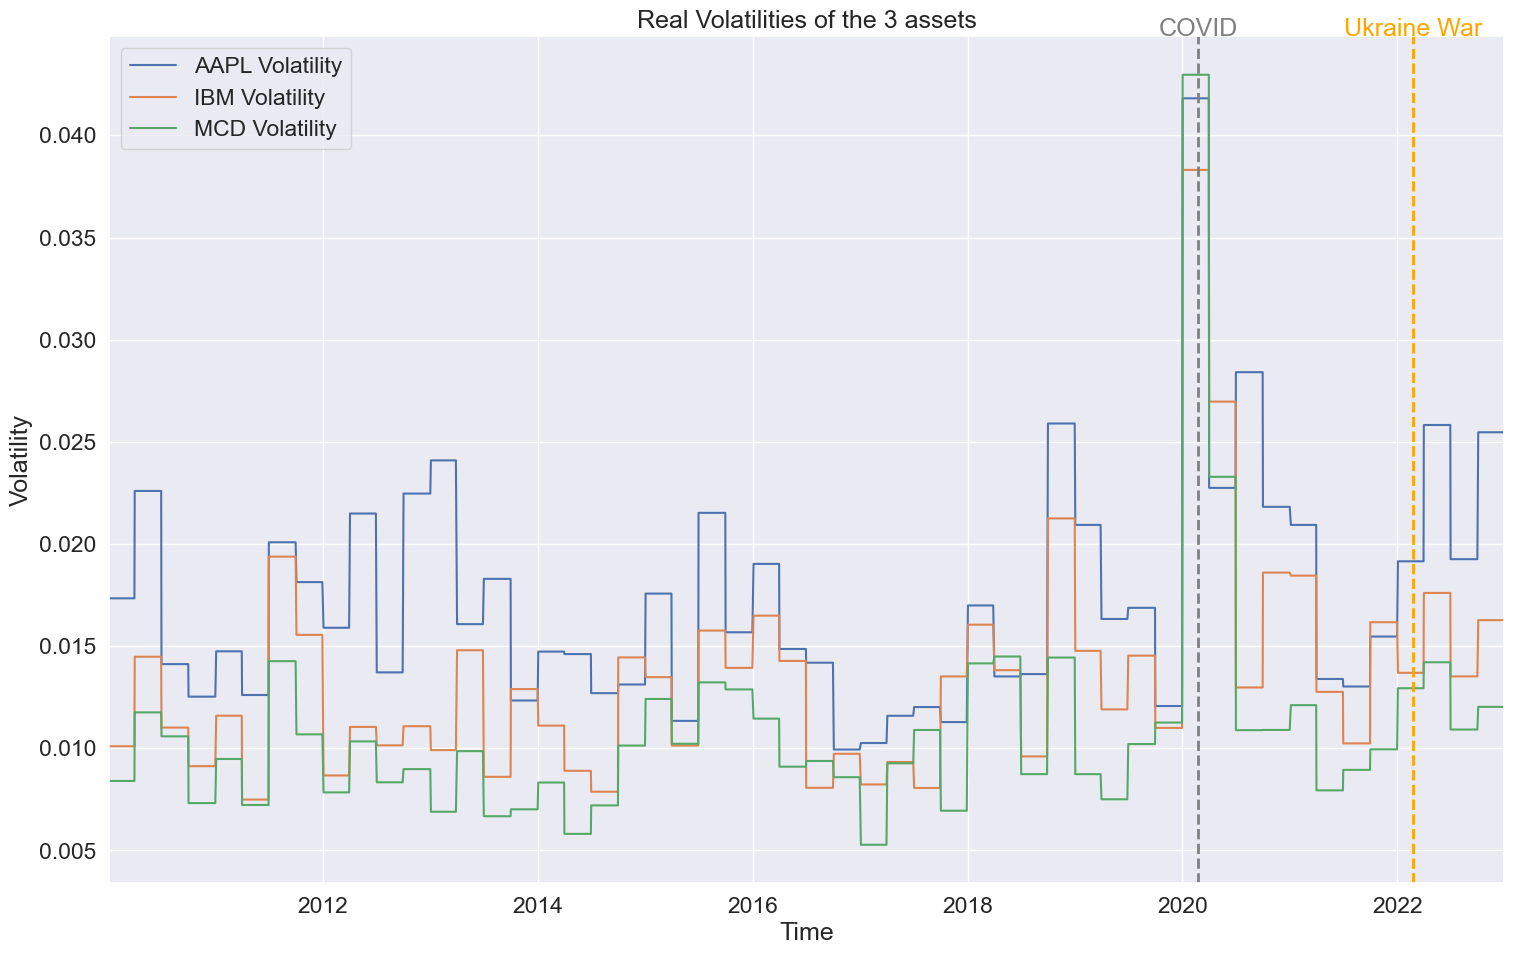

In [4]:
# THIS IS THE VISUALIZATION OF THE REAL VOLAITILITIES OF THE 3 ASSETS

# now calculates/extract the real volatilities of the 3 assets
real_volatilities = {}

for date, cov_matrix in prescientDict.items():
    volatilities = np.sqrt(np.diag(cov_matrix.values))
    real_volatilities[date] = pd.DataFrame(data = volatilities, index = cov_matrix.index, columns = ["volatility"])

# now real_volatilities is a dictionary that contains the real volatilities of the 3 assets for every day with the same key of the prescientDict dictionary(the timestamp)

# now separate the real volatilities of the 3 assets in 3 different dataframes
volatility_dict_aapl = {}
volatility_dict_ibm = {}
volatility_dict_mcd = {}

for date, volatilities in real_volatilities.items():
    volatility_dict_aapl[date] = volatilities.loc[7]["volatility"] # 7 is the PERMCO code of AAPL
    volatility_dict_ibm[date] = volatilities.loc[20990]["volatility"] # 20990 is the PERMCO code of IBM
    volatility_dict_mcd[date] = volatilities.loc[21177]["volatility"] # 21177 is the PERMCO code of MCD

# Convert the dictionaries to DataFrames for easier manipulation and plotting
df_volatility_aapl = pd.DataFrame(list(volatility_dict_aapl.items()), columns=['Date', 'AAPL Volatility'])
df_volatility_ibm = pd.DataFrame(list(volatility_dict_ibm.items()), columns=['Date', 'IBM Volatility'])
df_volatility_mcd = pd.DataFrame(list(volatility_dict_mcd.items()), columns=['Date', 'MCD Volatility'])

# Set the 'Date' column as the index
df_volatility_aapl.set_index('Date', inplace=True)
df_volatility_ibm.set_index('Date', inplace=True)
df_volatility_mcd.set_index('Date', inplace=True)

# Plot the real volatilities of the 3 assets
plt.figure(figsize=(18, 11))
plt.plot(df_volatility_aapl, label='AAPL Volatility')
plt.plot(df_volatility_ibm, label='IBM Volatility')
plt.plot(df_volatility_mcd, label='MCD Volatility')
plt.legend()
plt.title("Real Volatilities of the 3 assets")
plt.xlabel("Time")
plt.ylabel("Volatility")

# Adding vertical lines for specific events
plt.axvline(pd.Timestamp('2020-02-24'), color='gray', linestyle='--', lw=2)  # COVID start
plt.axvline(pd.Timestamp('2022-02-24'), color='orange', linestyle='--', lw=2)  # Ukraine War start

# Annotations for the events
plt.text(pd.Timestamp('2020-02-24'), plt.ylim()[1], 'COVID', horizontalalignment='center', color='gray')
plt.text(pd.Timestamp('2022-02-24'), plt.ylim()[1], 'Ukraine War', horizontalalignment='center', color='orange')

# Set x-axis limits to match the start and end dates
plt.xlim(left=df_volatility_aapl.index[0], right=df_volatility_aapl.index[-1])
plt.show()

also for this model i skip at the moment the train and validation phase, i just use the test data to see the performance of the model(the rolling window memory parameter used is 50; the perfect parameter for a 3 assets portfolio)

HYBRID MODEL PREDICTOR IMPLEMENTATION -> covMatrix = (1-x) * K + x * H

Where:
1. K is the covariance matrix calculated using a predictor like RW, EWMA, MGARCH 
2. H is the covariance matrix of the ExpandingWindow model
3. x is a weight between 0 and 1; 0 at the beginning of the quarter and 1 at the end of the quarter

In [5]:
# for this hybrid implementation the lambda parameter is incremented linearly in each quarter. so it is like the inverse of the number of days in a quarter

startingTestDate = testDataWithPercentageChange.index[0].strftime("%Y-%m-%d")
endingTestDate = testDataWithPercentageChange.index[-1].strftime("%Y-%m-%d")

# select the best beta value for the EWMA predictor (the one found in the previous step)
beta = 0.95

ewma_halflife = -np.log(2) / np.log(beta)

# now i will use the best beta value to perform the test phase

# now i want to print the repective value of beta: the beta is the value of the decay factor used in the ewma formula
print("ewma_halflife used: " + str(ewma_halflife) + "\n")

# ewma is a dictionary that contains the covariance matrix calculated using the ewma formula written inside the paper
# the key of the dictionary is the timestamp and the value is the covariance matrix calculated for that day
ewmaDict = dict(_ewma_cov(stocksPercentageChangeReturn, ewma_halflife))

print("dimension of the ewma dictionary: " + str(len(ewmaDict)))

ewma_halflife used: 13.513407333964874

dimension of the ewma dictionary: 3272


In [6]:
# NOW I IMPLEMENT AN EXPANDING WINDOW MODEL FOR EVERY QUARTER
# empirical covariance matrix using paper formula
expandingWindowDict = expandingWindowPredictor(stocksPercentageChangeReturn)

print("dimension of dataset: " + str(uniformlyDistributedReturns.shape))

print("len of the expanding window dictionary: " + str(len(expandingWindowDict)))

# print just the first key and value of the dictionary
print(list(expandingWindowDict.keys())[0])
print(expandingWindowDict[list(expandingWindowDict.keys())[0]])

dimension of dataset: (3272, 3)
len of the expanding window dictionary: 3272
2010-01-04 00:00:00
          7         20990     21177
7      0.000242  0.000184  0.000085
20990  0.000184  0.000140  0.000064
21177  0.000085  0.000064  0.000030


In [7]:
# first of all define the starting and ending date for the test phase: take the first and the last date of the test dataset

startingTestDate = testDataWithPercentageChange.index[0].strftime("%Y-%m-%d")
endingTestDate = testDataWithPercentageChange.index[-1].strftime("%Y-%m-%d")

start_date = pd.to_datetime(startingTestDate, format="%Y-%m-%d")
end_date = pd.to_datetime(endingTestDate, format="%Y-%m-%d")

names = ["EWMA", "EW"]

#these predictors are all dictionaries where each entry contains a Pandas DataFrame representing a covariance matrix of returns at each timestamp.  
predictors_temp = [ewmaDict, expandingWindowDict]
predictors = [] # so this is a list of dictionaries

for predictor in predictors_temp:
    predictors.append({t: predictor[t] for t in predictor.keys() if t >= start_date and t <= end_date})


ewmaDict = predictors[0]
expandingWindowDict = predictors[1]

# print the first 5 elements of the dictionary
for key in list(ewmaDict.keys())[:3]:
    print(key, ewmaDict[key])

# print the first 5 elements of the dictionary
for key in list(expandingWindowDict.keys())[:3]:
    print(key, expandingWindowDict[key])

# print the dimension of the dictionary
print("dimension of the ewma dictionary: " + str(len(ewmaDict)))
print("dimension of the expanding window dictionary: " + str(len(expandingWindowDict)))

2021-09-15 00:00:00           7         20990     21177
7      0.000167  0.000028  0.000012
20990  0.000028  0.000079  0.000029
21177  0.000012  0.000029  0.000052
2021-09-16 00:00:00           7         20990     21177
7      0.000158  0.000028  0.000011
20990  0.000028  0.000076  0.000025
21177  0.000011  0.000025  0.000053
2021-09-17 00:00:00           7         20990     21177
7      0.000167  0.000034  0.000013
20990  0.000034  0.000076  0.000025
21177  0.000013  0.000025  0.000051
2021-09-15 00:00:00           7         20990     21177
7      0.000165  0.000018  0.000046
20990  0.000018  0.000106  0.000027
21177  0.000046  0.000027  0.000075
2021-09-16 00:00:00           7         20990     21177
7      0.000162  0.000018  0.000045
20990  0.000018  0.000105  0.000026
21177  0.000045  0.000026  0.000075
2021-09-17 00:00:00           7         20990     21177
7      0.000165  0.000021  0.000045
20990  0.000021  0.000105  0.000026
21177  0.000045  0.000026  0.000074
dimension of the

In [8]:
# HYBRID MODEL IMPLEMENTATION
# i have defined inside the 2 box above the expanding window and the ewma predictors; now i will use them to implement the hybrid model

# the hybrid model is a combination of the expanding window and the ewma predictors; the lambda parameter is incremented linearly in each quarter. so it is like the inverse of the number of days in a quarter

hybridModelDict = hybridPredictor(uniformlyDistributedReturns, testDataWithPercentageChange, expandingWindowDict, ewmaDict, start_date)

print("dimension of the hybrid model dictionary: " + str(len(hybridModelDict)))

print("first 3 elements of the hybrid model dictionary: ")
for key in list(hybridModelDict.keys())[:3]:
    print(key, hybridModelDict[key])

dimension of the hybrid model dictionary: 327
first 3 elements of the hybrid model dictionary: 
2021-09-15 00:00:00           7         20990     21177
7      0.000167  0.000028  0.000012
20990  0.000028  0.000079  0.000029
21177  0.000012  0.000029  0.000052
2021-09-16 00:00:00           7         20990     21177
7      0.000159  0.000027  0.000014
20990  0.000027  0.000079  0.000025
21177  0.000014  0.000025  0.000055
2021-09-17 00:00:00           7         20990     21177
7      0.000167  0.000032  0.000019
20990  0.000032  0.000082  0.000025
21177  0.000019  0.000025  0.000055


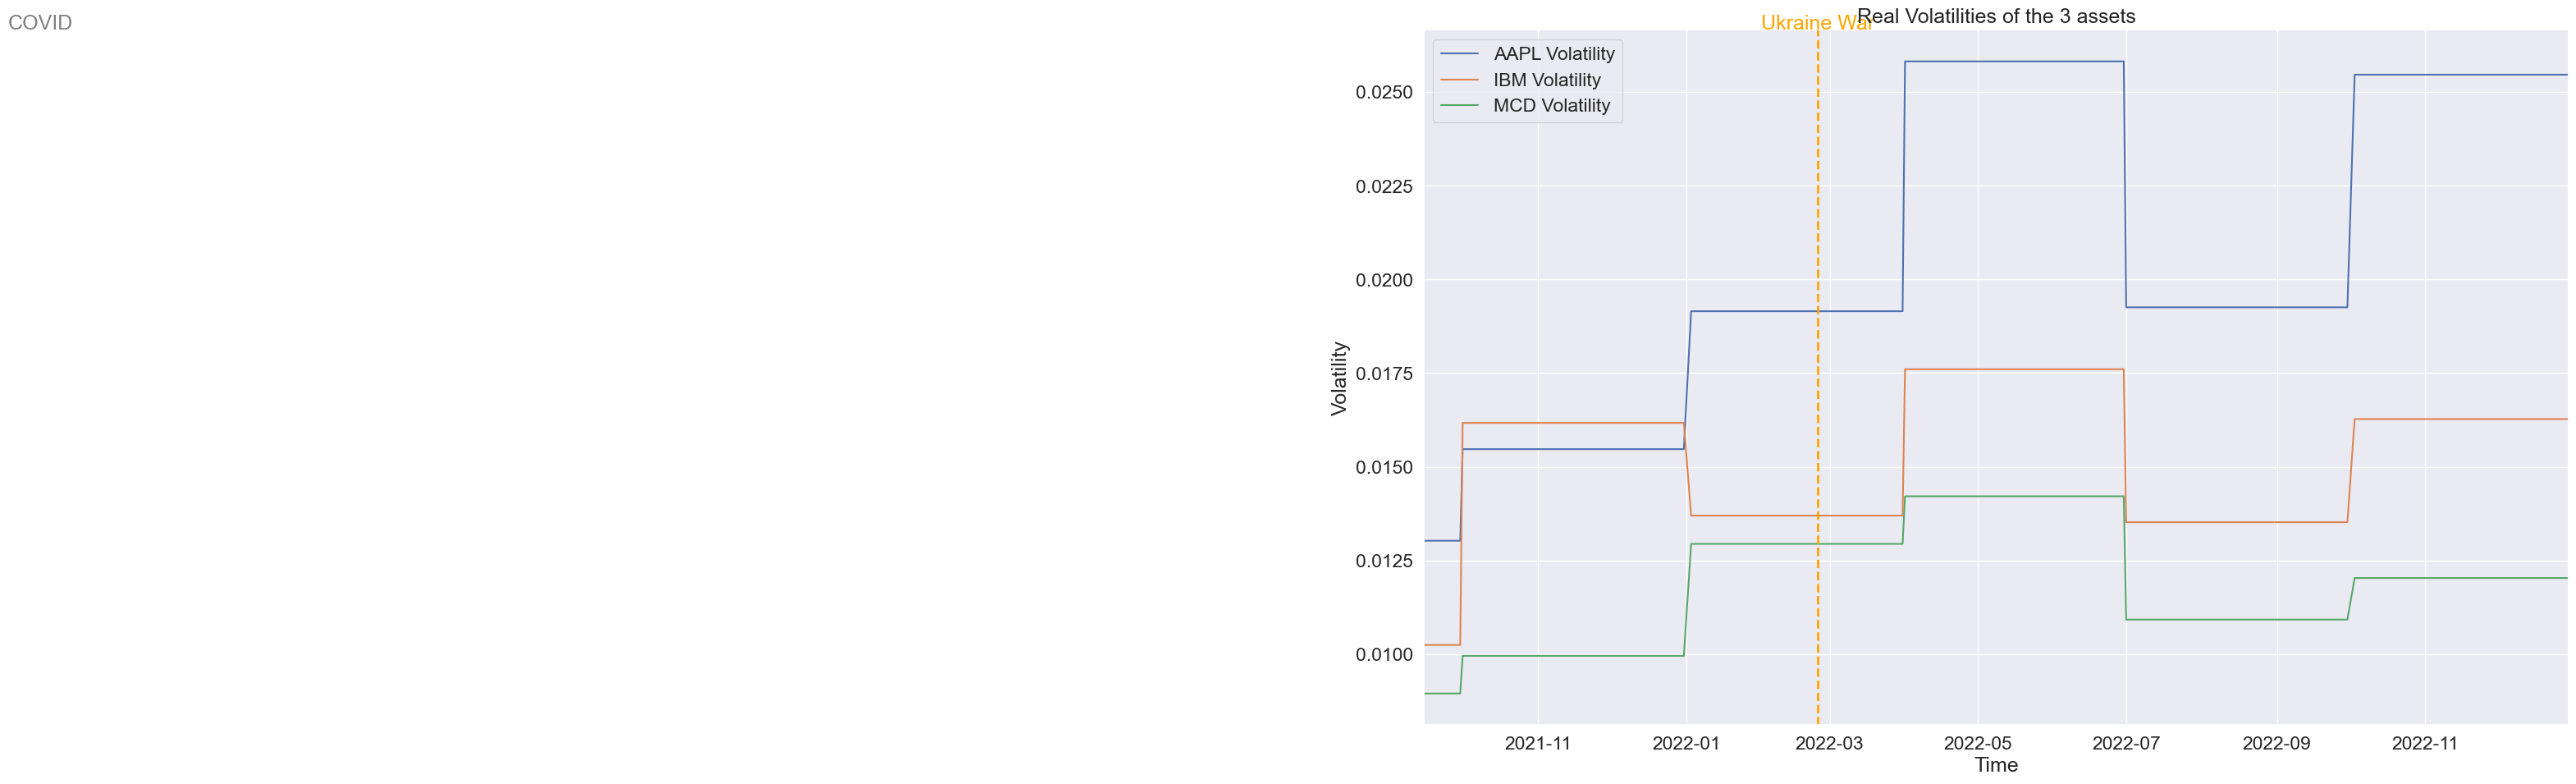

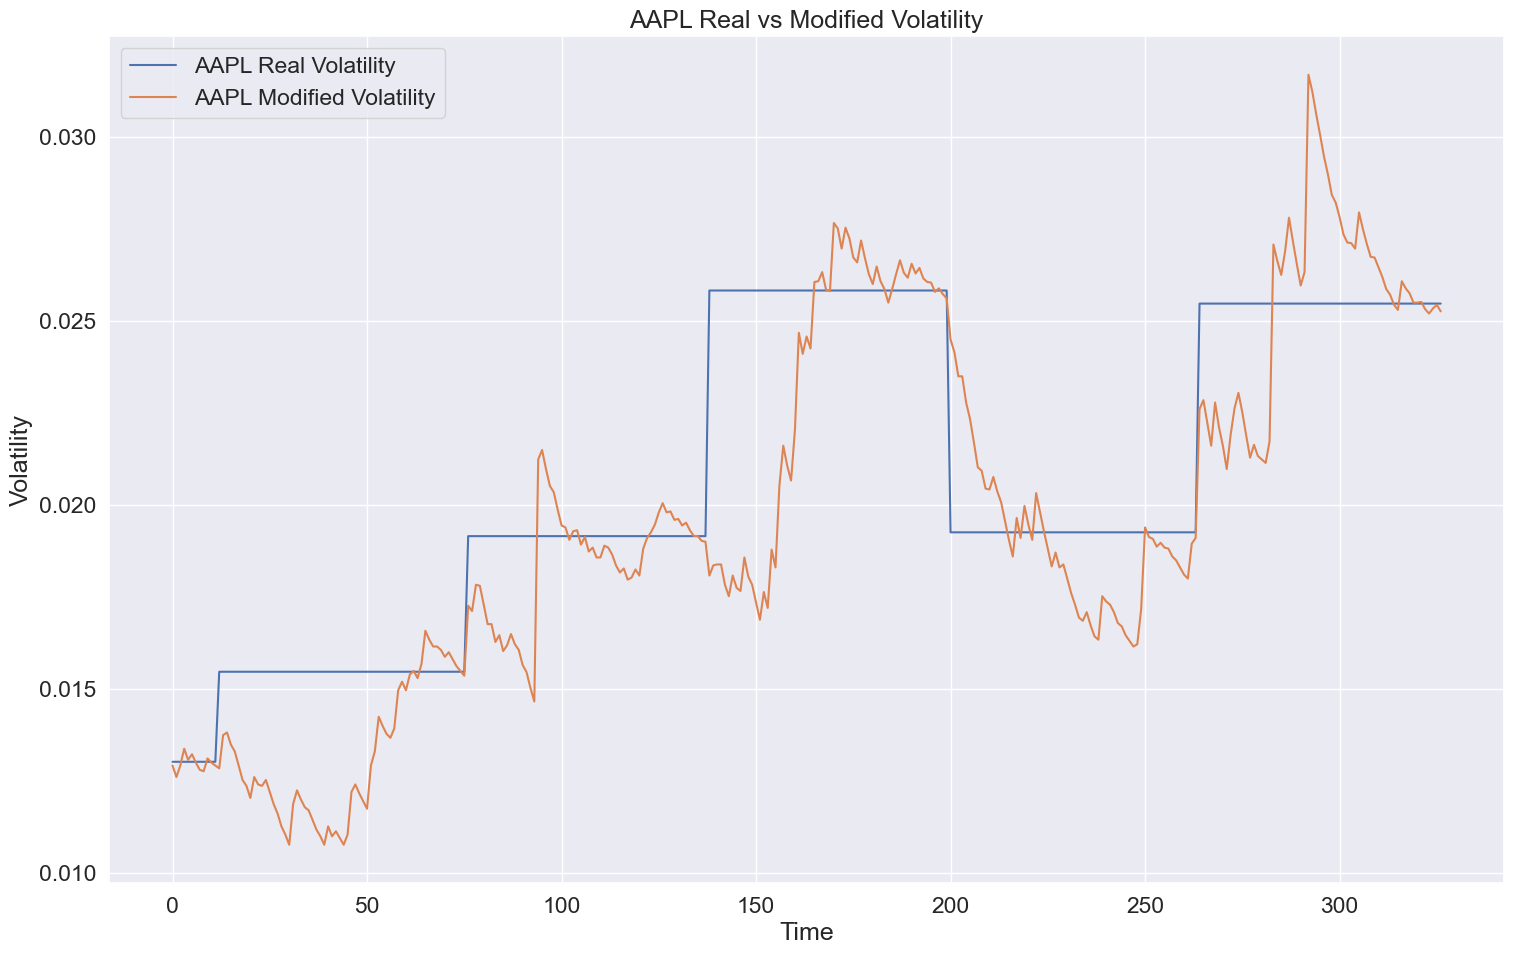

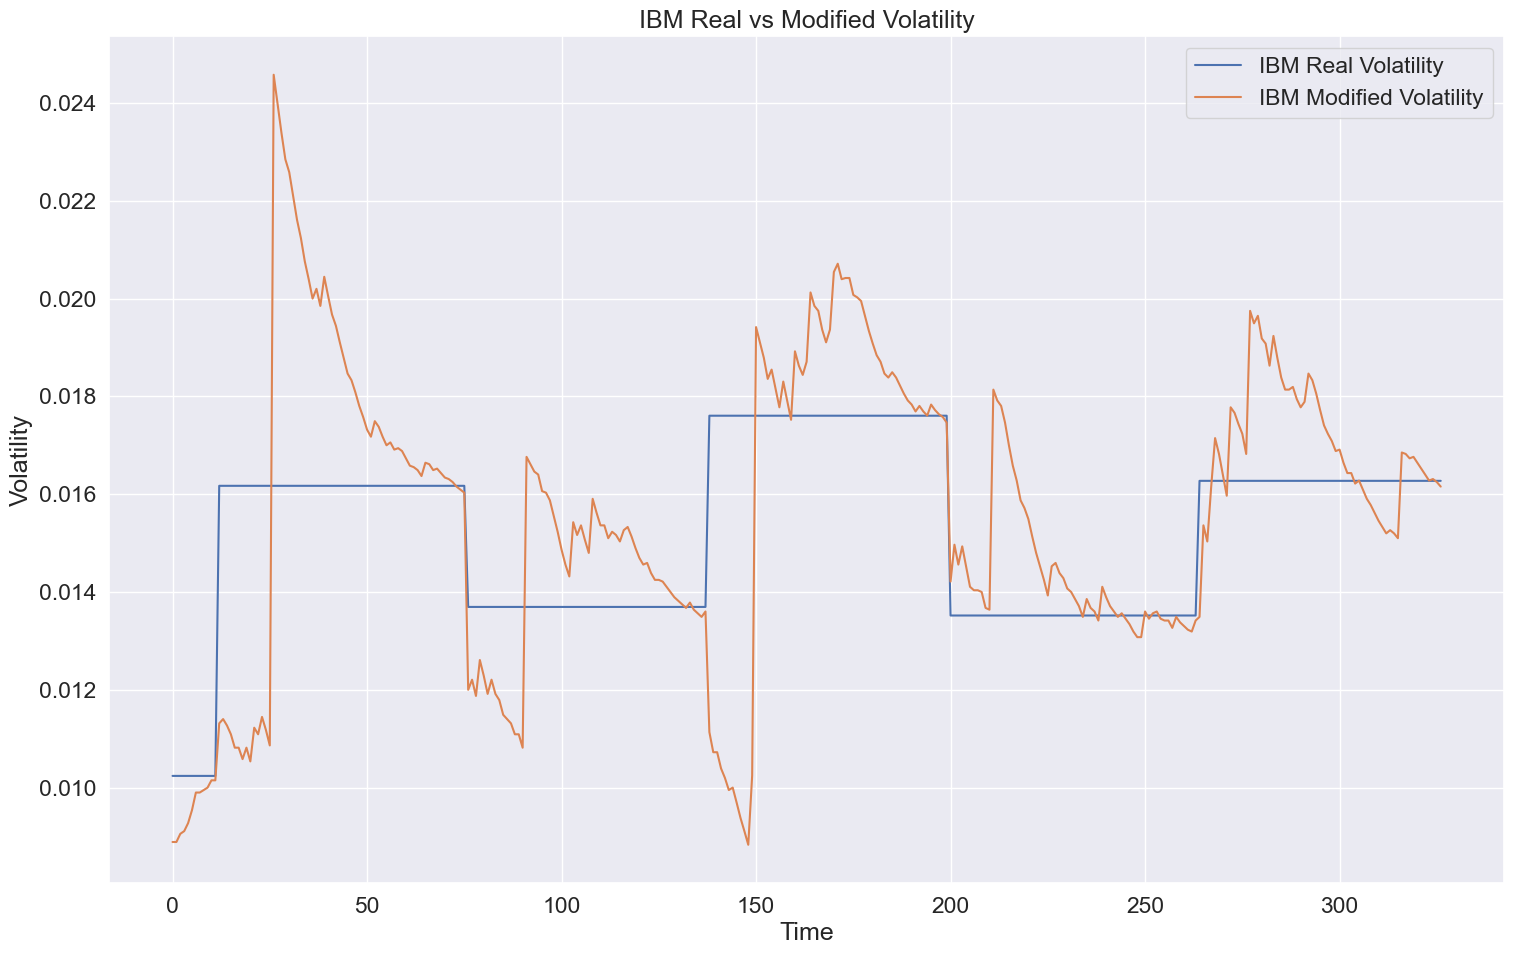

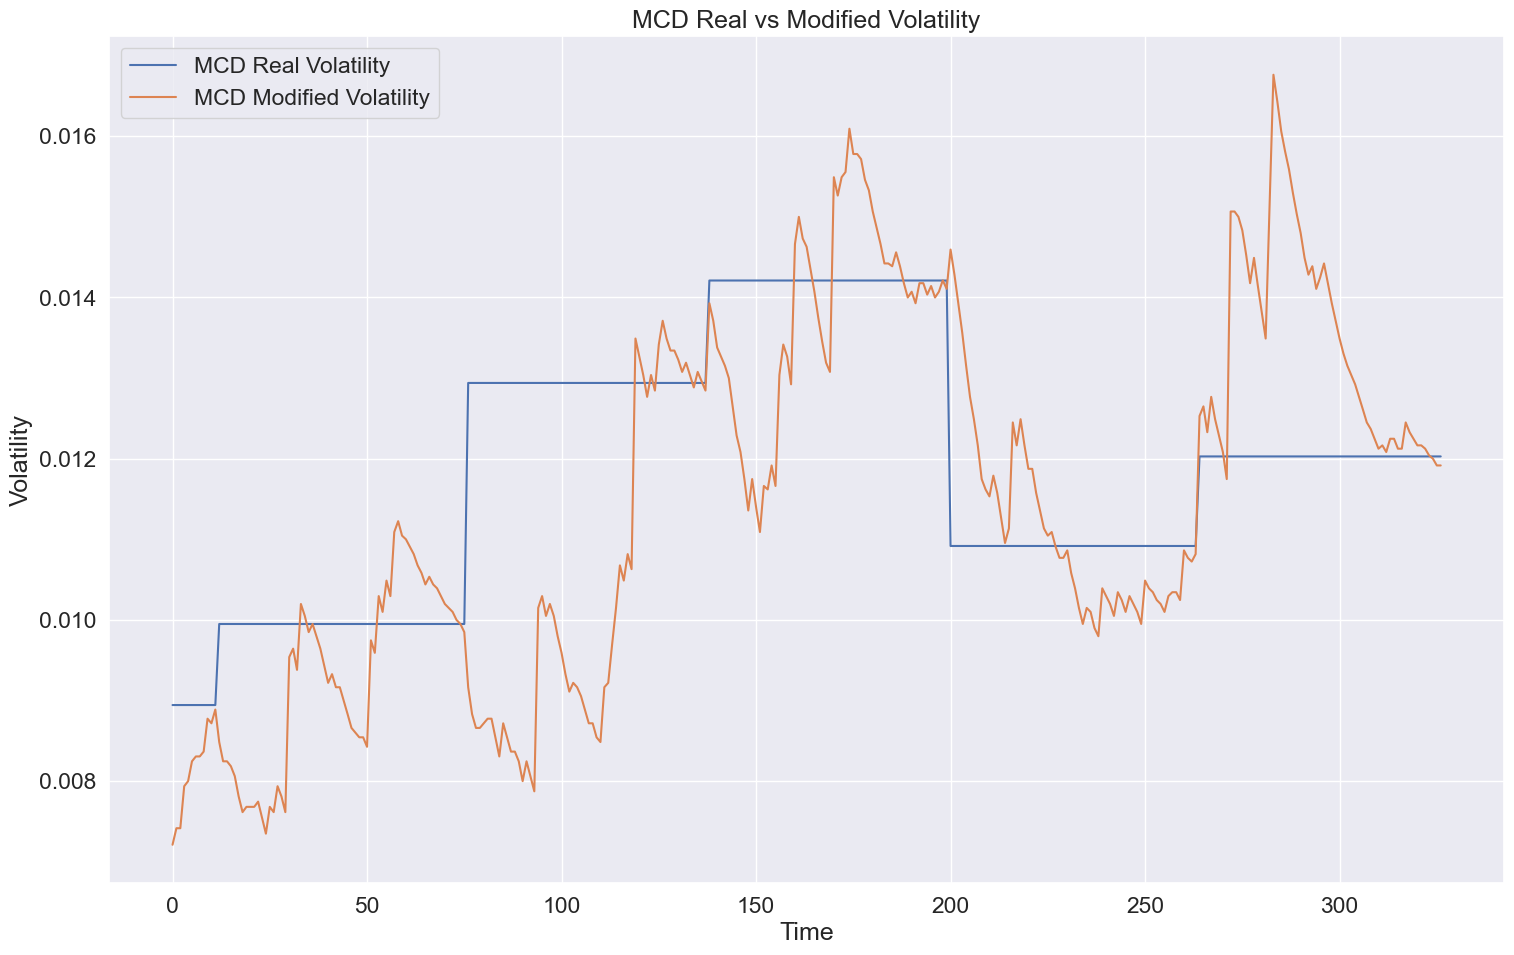

In [9]:
# now i plot hybrid model volatilities with respect to the real volatilities(prescient volatilities)
# THIS IS THE VISUALIZATION OF THE REAL VOLAITILITIES OF THE 3 ASSETS

startingTestDate = testDataWithPercentageChange.index[0].strftime("%Y-%m-%d")
endingTestDate = testDataWithPercentageChange.index[-1].strftime("%Y-%m-%d")

hybrid_model_volatilities = {}

for date, cov_matrix in hybridModelDict.items():
    volatilities = np.sqrt(np.diag(cov_matrix.values))
    hybrid_model_volatilities[date] = pd.DataFrame(data = volatilities, index = cov_matrix.index, columns = ["volatility"])


# now filter the rw volatilities between the start and end date
real_volatility_startDate = pd.to_datetime(startingTestDate)
real_volatility_endDate = pd.to_datetime(endingTestDate)

hybrid_model_volatilities = {k: v for k, v in hybrid_model_volatilities.items() if k >= real_volatility_startDate and k <= real_volatility_endDate}

# now calculates/extract the real volatilities of the 3 assets
hybrid_model_volatility_dict_aapl = {}
hybrid_model_volatility_dict_ibm = {}
hybrid_model_volatility_dict_mcd = {}

for date, volatilities in hybrid_model_volatilities.items():
    hybrid_model_volatility_dict_aapl[date] = volatilities.loc[7]["volatility"] # 7 is the PERMCO code of AAPL
    hybrid_model_volatility_dict_ibm[date] = volatilities.loc[20990]["volatility"] # 20990 is the PERMCO code of IBM
    hybrid_model_volatility_dict_mcd[date] = volatilities.loc[21177]["volatility"] # 21177 is the PERMCO code of MCD

# Convert the dictionaries to DataFrames for easier manipulation and plotting
df_hybrid_model_volatility_aapl = pd.DataFrame(list(hybrid_model_volatility_dict_aapl.items()), columns=['Date', 'AAPL Volatility'])
df_hybrid_model_volatility_ibm = pd.DataFrame(list(hybrid_model_volatility_dict_ibm.items()), columns=['Date', 'IBM Volatility'])
df_hybrid_model_volatility_mcd = pd.DataFrame(list(hybrid_model_volatility_dict_mcd.items()), columns=['Date', 'MCD Volatility'])

# Set the 'Date' column as the index
df_hybrid_model_volatility_aapl.set_index('Date', inplace=True)
df_hybrid_model_volatility_ibm.set_index('Date', inplace=True)
df_hybrid_model_volatility_mcd.set_index('Date', inplace=True)


real_voltilities = {}

for date, cov_matrix in prescientDict.items():
    volatilities = np.sqrt(np.diag(cov_matrix.values))
    real_voltilities[date] = pd.DataFrame(data = volatilities, index = cov_matrix.index, columns = ["volatility"])

real_voltilities = {k: v for k, v in real_voltilities.items() if k >= real_volatility_startDate and k <= real_volatility_endDate}

# now separate the real volatilities of the 3 assets in 3 different dataframes
volatility_dict_aapl = {}
volatility_dict_ibm = {}
volatility_dict_mcd = {}

for date, volatilities in real_voltilities.items():
    volatility_dict_aapl[date] = volatilities.loc[7]["volatility"] # 7 is the PERMCO code of AAPL
    volatility_dict_ibm[date] = volatilities.loc[20990]["volatility"] # 20990 is the PERMCO code of IBM
    volatility_dict_mcd[date] = volatilities.loc[21177]["volatility"] # 21177 is the PERMCO code of MCD

# Convert the dictionaries to DataFrames for easier manipulation and plotting
df_volatility_aapl = pd.DataFrame(list(volatility_dict_aapl.items()), columns=['Date', 'AAPL Volatility'])
df_volatility_ibm = pd.DataFrame(list(volatility_dict_ibm.items()), columns=['Date', 'IBM Volatility'])
df_volatility_mcd = pd.DataFrame(list(volatility_dict_mcd.items()), columns=['Date', 'MCD Volatility'])

# Set the 'Date' column as the index
df_volatility_aapl.set_index('Date', inplace=True)
df_volatility_ibm.set_index('Date', inplace=True)
df_volatility_mcd.set_index('Date', inplace=True)

# Plot the real volatilities of the 3 assets
plt.figure(figsize=(18, 11))
plt.plot(df_volatility_aapl, label='AAPL Volatility')
plt.plot(df_volatility_ibm, label='IBM Volatility')
plt.plot(df_volatility_mcd, label='MCD Volatility')
plt.legend()
plt.title("Real Volatilities of the 3 assets")
plt.xlabel("Time")
plt.ylabel("Volatility")

# Adding vertical lines for specific events
plt.axvline(pd.Timestamp('2020-02-24'), color='gray', linestyle='--', lw=2)  # COVID start
plt.axvline(pd.Timestamp('2022-02-24'), color='orange', linestyle='--', lw=2)  # Ukraine War start

# Annotations for the events
plt.text(pd.Timestamp('2020-02-24'), plt.ylim()[1], 'COVID', horizontalalignment='center', color='gray')
plt.text(pd.Timestamp('2022-02-24'), plt.ylim()[1], 'Ukraine War', horizontalalignment='center', color='orange')

# Set x-axis limits to match the start and end dates
plt.xlim(left=df_volatility_aapl.index[0], right=df_volatility_aapl.index[-1])
plt.show()


##################################################################################
# now save every volatility value in a vector. This vector will contain only the value of the apple volatility, without timestamp
aapl_real_volatility = df_volatility_aapl["AAPL Volatility"].values
real_volatility_startDate = df_volatility_aapl.index[0]
real_volatility_endDate = df_volatility_aapl.index[-1]

ibm_real_volatility = df_volatility_ibm["IBM Volatility"].values
mcd_real_volatility = df_volatility_mcd["MCD Volatility"].values

# now do the same thing with the volatilities calculated using the expanding window matrix
aapl_hybrid_model_volatility = df_hybrid_model_volatility_aapl["AAPL Volatility"].values
hybrid_model_volatility_startDate = df_hybrid_model_volatility_aapl.index[0]
hybrid_model_volatility_endDate = df_hybrid_model_volatility_aapl.index[-1]

ibm_hybrid_model_volatility = df_hybrid_model_volatility_ibm["IBM Volatility"].values
mcd_hybrid_model_volatility = df_hybrid_model_volatility_mcd["MCD Volatility"].values


# plot 3 charts to compare the real volatilities with the modified volatilities
plt.figure(figsize=(18, 11))
plt.plot(aapl_real_volatility, label='AAPL Real Volatility')
plt.plot(aapl_hybrid_model_volatility, label='AAPL Modified Volatility')
plt.legend()
plt.title("AAPL Real vs Modified Volatility")
plt.xlabel("Time")
plt.ylabel("Volatility")

plt.figure(figsize=(18, 11))
plt.plot(ibm_real_volatility, label='IBM Real Volatility')
plt.plot(ibm_hybrid_model_volatility, label='IBM Modified Volatility')
plt.legend()
plt.title("IBM Real vs Modified Volatility")
plt.xlabel("Time")
plt.ylabel("Volatility")

plt.figure(figsize=(18, 11))
plt.plot(mcd_real_volatility, label='MCD Real Volatility')
plt.plot(mcd_hybrid_model_volatility, label='MCD Modified Volatility')
plt.legend()
plt.title("MCD Real vs Modified Volatility")
plt.xlabel("Time")
plt.ylabel("Volatility")

plt.show()

##################################################################################


# Test Phase for Hybrid Model predictor

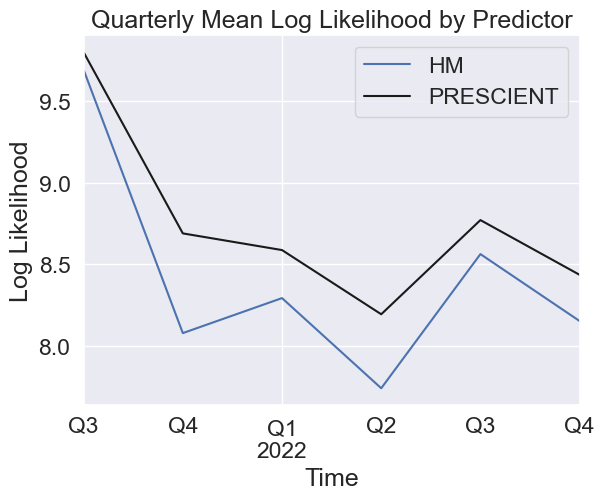



meanRegret: 0.300
stdRegret: 0.200
maxRegret: 0.600


meanLoglikelihoodHM: 8.400
stdLoglikelihoodHM: 0.600
maxLoglikelihoodHM: 9.700


meanLoglikelihoodPRESCIENT: 8.700
stdLoglikelihoodPRESCIENT: 0.500
maxLoglikelihoodPRESCIENT: 9.800

HM MSE
mean: 0.0000015790
std: 0.0000010287
max: 0.0000031152


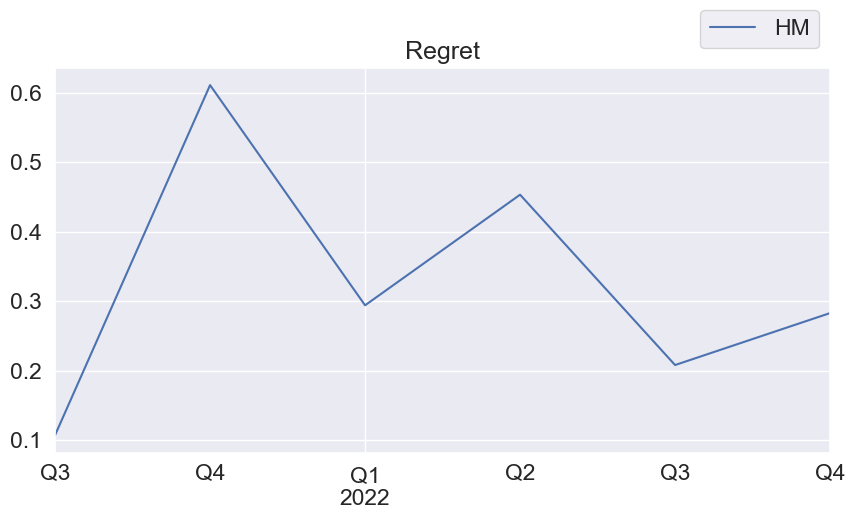

In [10]:
# NOW I DO THE LAST THING; THE COMPARISON BETWEEN THE RW PREDICTOR AND THE PRESCIENT PREDICTOR IN TERMS OF 
# LOGLIKELIHOOD, LOGLIKELIHOOD REGRET AND MSE

# first of all define the starting and ending date for the test phase: take the first and the last date of the test dataset

startingTestDate = testDataWithPercentageChange.index[0].strftime("%Y-%m-%d")
endingTestDate = testDataWithPercentageChange.index[-1].strftime("%Y-%m-%d")

start_date = pd.to_datetime(startingTestDate, format="%Y-%m-%d")
end_date = pd.to_datetime(endingTestDate, format="%Y-%m-%d")

names = ["HM", "PRESCIENT"]

#these predictors are all dictionaries where each entry contains a Pandas DataFrame representing a covariance matrix of returns at each timestamp.  
predictors_temp = [hybridModelDict, prescientDict]
predictors = [] # so this is a list of dictionaries

for predictor in predictors_temp:
    predictors.append({t: predictor[t] for t in predictor.keys() if t >= start_date and t <= end_date})

#
# LOG-LIKELIHOODS
#

'''
    this dictionary has a shape like this:
    {
        RW: pd.Series(log_likelihood(returns_temp, Sigmas_temp), index=times),
        EWMA: pd.Series(log_likelihood(returns_temp, Sigmas_temp), index=times),
        MGARCH: pd.Series(log_likelihood(returns_temp, Sigmas_temp), index=times),
        PRESCIENT: pd.Series(log_likelihood(returns_temp, Sigmas_temp), index=times),
    }

    where each pd.series is a series of log-likelihoods for each timestamp: so there is the log-likelihood value for each timestamp
'''

log_likelihoods = {}
for i, predictorDict in enumerate(predictors):

    # if the predictor is the prescient predictor, i have to use the uniformly distributed dataset
    if names[i] == "PRESCIENT":
        returns_temp = uniformlyDistributedReturns.loc[pd.Series(predictorDict).index].values[1:]
    
    else:
        returns_temp = testDataWithPercentageChange.loc[pd.Series(predictorDict).index].values[1:]

    times = pd.Series(predictorDict).index[1:]
    Sigmas_temp = np.stack([predictorDict[t].values for t in predictorDict.keys()])[:-1]       
    log_likelihoods[names[i]] = pd.Series(log_likelihood(returns_temp, Sigmas_temp), index=times)

# Iterate through each predictor in the log_likelihoods dictionary
for name in log_likelihoods.keys():
    if name == 'PRESCIENT':
        # Resample by quarter, take the mean, and plot with specific color and label
        log_likelihoods[name].resample("Q").mean().plot(label=name, c="k")
    else:
        # Resample by quarter, take the mean, and plot with default settings
        log_likelihoods[name].resample("Q").mean().plot(label=name)

plt.xlabel('Time')  # Set the x-axis label
plt.ylabel('Log Likelihood')  # Set the y-axis label
plt.title('Quarterly Mean Log Likelihood by Predictor')  # Set the title of the plot
plt.legend()  # Show the legend to identify each predictor
plt.show()  # Display the plot

'''
    this dictionary has a shape like this:
    {
        RW: pd.Series(...),
        EWMA: pd.Series(...),
        MGARCH: pd.Series(...),
        PRESCIENT: pd.Series(...),
    }

    where each pd.series is a series of regret for each timestamp: so there is the 
    regret value (the difference between the log-likelihood of the prescient model and the log-likelihood of the model) for each timestamp
'''
regrets = {}
for name in log_likelihoods:
    regrets[name] =  log_likelihoods["PRESCIENT"] - log_likelihoods[name]


fig, ax = plt.subplots(1, 1, figsize=(10, 5))
for name in names:
    if name == 'PRESCIENT':
        pass
    else:
        regrets[name].resample("Q").mean().plot(label=name)
plt.legend(bbox_to_anchor=(1, 1.1), loc='center right', ncols=4, labels=names[:-1], scatterpoints=1, markerscale=5);
plt.title("Regret")

for name in regrets:
    if name != "PRESCIENT":

        #Each data point in the regret series now represents the average regret for a respective quarter. If the original series spans multiple years, then the number of data points in regret will be the number of quarters in that time frame.
        regret = regrets[name].resample("Q").mean() #it resamples the regret Series to a quarterly frequency, This gives the average regret for each quarter rather than daily regret values  
        # so the regret variable is a series of average regret for each quarter
        
        regretMetrics = (np.mean(regret).round(1), np.std(regret).round(1), np.max(regret).round(1))
        # the round(1) function to each of these metrics, which rounds the result to one decimal place,

        # save the regret mean values to plot a chart
        rwMeanRegretValues.append(regretMetrics[0])

print("\n")
print(f"meanRegret: {regretMetrics[0]:.3f}")
print(f"stdRegret: {regretMetrics[1]:.3f}")
print(f"maxRegret: {regretMetrics[2]:.3f}")

# copy the log-likelihoods dictionary
log_likelihoods_copy = log_likelihoods.copy()

# do the same thing for log-likelihoods dictionary
for name in log_likelihoods_copy:
    logLikelihood = log_likelihoods_copy[name].resample("Q").mean()
    logLikelihoodMetrics = (np.mean(logLikelihood).round(1), np.std(logLikelihood).round(1), np.max(logLikelihood).round(1))

    print("\n")
    print(f"meanLoglikelihood{name}: {logLikelihoodMetrics[0]:.3f}")
    print(f"stdLoglikelihood{name}: {logLikelihoodMetrics[1]:.3f}")
    print(f"maxLoglikelihood{name}: {logLikelihoodMetrics[2]:.3f}")


#
# MSEs
#

for i, predictorDict in enumerate(predictors):
    if names[i] != "PRESCIENT":
        MSE_temp = MSE(testDataWithPercentageChange, predictorDict).resample("Q").mean()

        print("\n" + names[i] + " MSE")
        print(f"mean: {MSE_temp.mean():.10f}")
        print(f"std: {MSE_temp.std():.10f}")
        print(f"max: {MSE_temp.max():.10f}")